In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("../backend/data/raw/movies.csv")
links = pd.read_csv('../backend/data/raw/links.csv')
ratings = pd.read_csv('../backend/data/raw/ratings.csv')
tags = pd.read_csv('../backend/data/raw/tags.csv')

In [4]:
df = movies.merge(ratings, on='movieId', how='left') \
                     .merge(links, on='movieId', how='left') \
                     .merge(tags, on='movieId', how='left')

In [5]:
df.head()

,movieId,title,genres,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,114709,862.0,336.0,pixar,1.139046e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,114709,862.0,474.0,pixar,1.137207e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,114709,862.0,567.0,fun,1.525286e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,114709,862.0,336.0,pixar,1.139046e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,114709,862.0,474.0,pixar,1.137207e+09


In [6]:
df.describe()

,movieId,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,timestamp_y
count,285783.000000,285762.000000,285762.000000,2.857620e+05,2.857830e+05,285770.000000,233234.000000,2.332340e+05
mean,14927.663741,313.894279,3.841270,1.214707e+09,2.956050e+05,12797.315320,470.681354,1.384754e+09
std,31402.673519,179.451387,1.020798,2.233730e+08,5.150156e+05,43479.255523,153.324249,1.534705e+08
min,1.000000,1.000000,0.500000,8.281246e+08,4.170000e+02,2.000000,2.000000,1.137179e+09
25%,296.000000,160.000000,3.000000,1.019133e+09,1.098300e+05,489.000000,424.000000,1.242494e+09
50%,1721.000000,314.000000,4.000000,1.211377e+09,1.125730e+05,680.000000,477.000000,1.457901e+09
75%,5673.000000,465.000000,4.500000,1.445346e+09,2.415270e+05,8963.000000,599.000000,1.498457e+09
max,193609.000000,610.000000,5.000000,1.537799e+09,8.391976e+06,525662.000000,610.000000,1.537099e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   title        285783 non-null  object 
 2   genres       285783 non-null  object 
 3   userId_x     285762 non-null  float64
 4   rating       285762 non-null  float64
 5   timestamp_x  285762 non-null  float64
 6   imdbId       285783 non-null  int64  
 7   tmdbId       285770 non-null  float64
 8   userId_y     233234 non-null  float64
 9   tag          233234 non-null  object 
 10  timestamp_y  233234 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 24.0+ MB


In [8]:
# Remove duplicates
movies = movies.drop_duplicates()
ratings = ratings.drop_duplicates()
links = links.drop_duplicates()
tags = tags.drop_duplicates()

# Convert data types
ratings['rating'] = ratings['rating'].astype(float)
movies['genres'] = movies['genres'].astype('category')

# Handle missing values
ratings = ratings.dropna()  # Remove rows with missing ratings
tags = tags.fillna('No Tag')  # Replace missing tags with 'No Tag'

# Check for missing values in each DataFrame
missing_movies = movies.isnull().sum()
missing_ratings = ratings.isnull().sum()
missing_links = links.isnull().sum()
missing_tags = tags.isnull().sum()

# Display missing values summary
print("Missing Values in Movies:\n", missing_movies)
print("\nMissing Values in Ratings:\n", missing_ratings)
print("\nMissing Values in Links:\n", missing_links)
print("\nMissing Values in Tags:\n", missing_tags)

Missing Values in Movies:
 movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Links:
 movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing Values in Tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [9]:
# Inspecting the columns and their data types
numerical_columns = ratings.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = movies.select_dtypes(include=['category', 'object']).columns.tolist()

# Additional inspection for links and tags
link_columns = links.columns.tolist()
tag_columns = tags.columns.tolist()

# Displaying the results
print("Numerical Columns in Ratings:\n", numerical_columns)
print("\nCategorical Columns in Movies:\n", categorical_columns)
print("\nColumns in Links:\n", link_columns)
print("\nColumns in Tags:\n", tag_columns)

Numerical Columns in Ratings:
 ['userId', 'movieId', 'rating', 'timestamp']

Categorical Columns in Movies:
 ['title', 'genres']

Columns in Links:
 ['movieId', 'imdbId', 'tmdbId']

Columns in Tags:
 ['userId', 'movieId', 'tag', 'timestamp']


In [10]:
# Dispersion Analysis
rating_range = ratings['rating'].max() - ratings['rating'].min()
std_deviation = ratings['rating'].std()
variance = std_deviation ** 2

rating_range, std_deviation, variance

(4.5, 1.042529239060635, 1.086867214296347)

In [11]:
# Shape of the Distribution Analysis
skewness = ratings['rating'].skew()
kurtosis = ratings['rating'].kurtosis()

skewness, kurtosis

(-0.6371993892529214, 0.12331407123922622)

In [12]:
# Frequency Count for Genres
genre_counts = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

# Frequency Count for Tags
tag_counts = tags['tag'].value_counts()

genre_counts, tag_counts

(Drama                 4361
 Comedy                3756
 Thriller              1894
 Action                1828
 Romance               1596
 Adventure             1263
 Crime                 1199
 Sci-Fi                 980
 Horror                 978
 Fantasy                779
 Children               664
 Animation              611
 Mystery                573
 Documentary            440
 War                    382
 Musical                334
 Western                167
 IMAX                   158
 Film-Noir               87
 (no genres listed)      34
 dtype: int64,
 tag
 In Netflix queue     131
 atmospheric           36
 thought-provoking     24
 superhero             24
 funny                 23
                     ... 
 small towns            1
 In Your Eyes           1
 Lloyd Dobbler          1
 weak plot              1
 Heroic Bloodshed       1
 Name: count, Length: 1589, dtype: int64)

In [13]:
# Mode for Genres
most_common_genre = genre_counts.idxmax()
most_common_genre_count = genre_counts.max()

# Mode for Tags
most_common_tag = tag_counts.idxmax()
most_common_tag_count = tag_counts.max()

most_common_genre, most_common_genre_count, most_common_tag, most_common_tag_count

('Drama', 4361, 'In Netflix queue', 131)

In [14]:
# Proportions for Genres
genre_proportions = genre_counts / genre_counts.sum() * 100

# Proportions for Tags
tag_proportions = tag_counts / tag_counts.sum() * 100

genre_proportions, tag_proportions

(Drama                 19.747328
 Comedy                17.007788
 Thriller               8.576345
 Action                 8.277486
 Romance                7.226952
 Adventure              5.719073
 Crime                  5.429270
 Sci-Fi                 4.437602
 Horror                 4.428546
 Fantasy                3.527441
 Children               3.006702
 Animation              2.766709
 Mystery                2.594639
 Documentary            1.992393
 War                    1.729759
 Musical                1.512407
 Western                0.756204
 IMAX                   0.715450
 Film-Noir              0.393950
 (no genres listed)     0.153958
 dtype: float64,
 tag
 In Netflix queue     3.556883
 atmospheric          0.977464
 thought-provoking    0.651643
 superhero            0.651643
 funny                0.624491
                        ...   
 small towns          0.027152
 In Your Eyes         0.027152
 Lloyd Dobbler        0.027152
 weak plot            0.027152
 Heroic 

In [15]:
# Correlation Analysis
correlation_matrix = ratings[['userId', 'movieId', 'rating']].corr(method='pearson')

correlation_matrix

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [16]:
# Group-wise Summary Statistics
average_ratings_by_movie = ratings.groupby('movieId')['rating'].mean()
average_ratings_by_user = ratings.groupby('userId')['rating'].mean()
number_of_ratings_per_movie = ratings.groupby('movieId')['rating'].count()

average_ratings_by_movie, average_ratings_by_user, number_of_ratings_per_movie

(movieId
 1         3.920930
 2         3.431818
 3         3.259615
 4         2.357143
 5         3.071429
             ...   
 193581    4.000000
 193583    3.500000
 193585    3.500000
 193587    3.500000
 193609    4.000000
 Name: rating, Length: 9724, dtype: float64,
 userId
 1      4.366379
 2      3.948276
 3      2.435897
 4      3.555556
 5      3.636364
          ...   
 606    3.657399
 607    3.786096
 608    3.134176
 609    3.270270
 610    3.688556
 Name: rating, Length: 610, dtype: float64,
 movieId
 1         215
 2         110
 3          52
 4           7
 5          49
          ... 
 193581      1
 193583      1
 193585      1
 193587      1
 193609      1
 Name: rating, Length: 9724, dtype: int64)

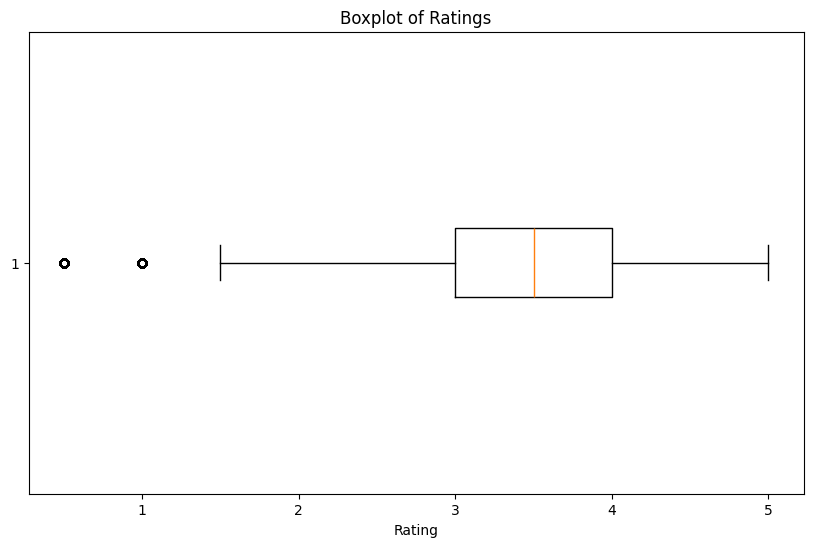

(count    100836.000000
 mean          3.501557
 std           1.042529
 min           0.500000
 25%           3.000000
 50%           3.500000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64,
         userId  movieId  rating   timestamp
 205          1     3176     1.0   964983504
 261          3       31     0.5  1306463578
 262          3      527     0.5  1306464275
 263          3      647     0.5  1306463619
 264          3      688     0.5  1306464228
 ...        ...      ...     ...         ...
 100374     610    68319     1.0  1493845505
 100415     610    72424     0.5  1493849030
 100426     610    74075     1.0  1493848880
 100734     610   120635     1.0  1493850489
 100797     610   145951     0.5  1493849019
 
 [4181 rows x 4 columns])

In [19]:
# Descriptive statistics for ratings
rating_description = ratings['rating'].describe()

# Calculate IQR
Q1 = rating_description['25%']
Q3 = rating_description['75%']
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ratings[(ratings['rating'] < lower_bound) | (ratings['rating'] > upper_bound)]

# Boxplot for visualizing outliers
plt.figure(figsize=(10, 6))
plt.boxplot(ratings['rating'], vert=False)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

rating_description, outliers

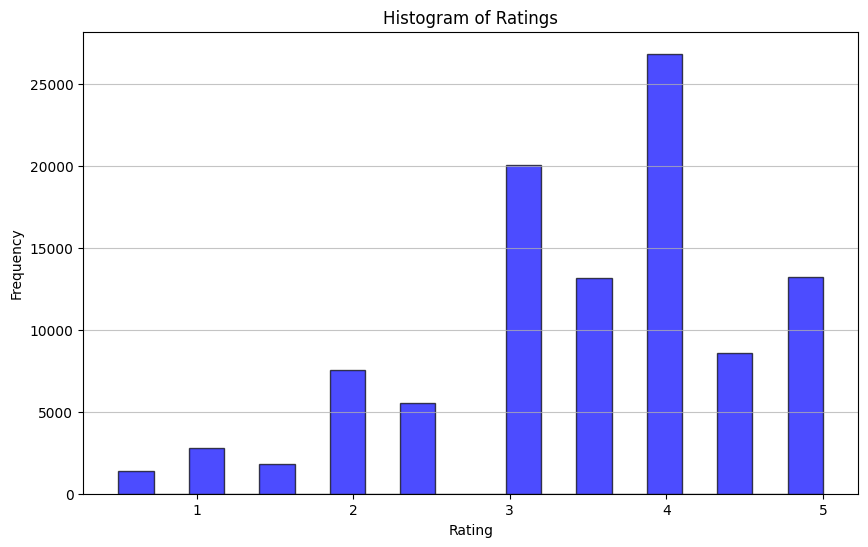

In [20]:
import matplotlib.pyplot as plt

# Plot histogram for ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()